In [143]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample # class imbalance is there
from  sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score #randonisedSearchCSV for large dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle 


In [144]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [145]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
 11  rainfall       366 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [146]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
rainfall         0
dtype: int64

In [147]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [148]:
df['rainfall'].value_counts() # class imbalance

rainfall
yes    249
no     117
Name: count, dtype: int64

In [149]:
df = df.drop(columns=["day"])

In [150]:
df['winddirection'].fillna(df['winddirection'].mode()[0],inplace=True)
df['windspeed'].fillna(df['windspeed'].median(),inplace=True)

C:\Users\Vihitha Mohan\AppData\Local\Temp\ipykernel_6756\1895871233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['winddirection'].fillna(df['winddirection'].mode()[0],inplace=True)
C:\Users\Vihitha Mohan\AppData\Local\Temp\ipykernel_6756\1895871233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [151]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [152]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [153]:
df.replace({'rainfall':{'yes':1,'no':0}},inplace=True)

C:\Users\Vihitha Mohan\AppData\Local\Temp\ipykernel_6756\3592165345.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'rainfall':{'yes':1,'no':0}},inplace=True)


In [154]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


##EDA

In [155]:
sns.set(style='whitegrid')

In [156]:
df.columns

Index(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

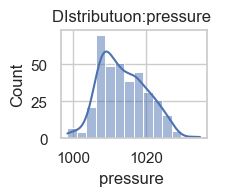

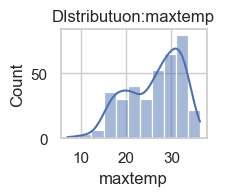

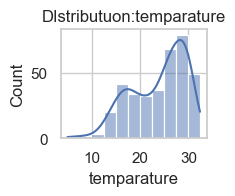

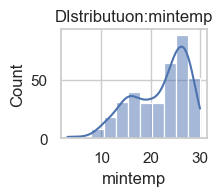

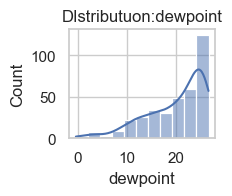

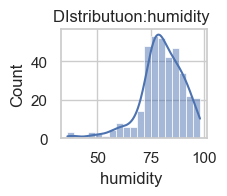

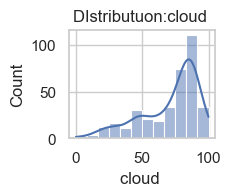

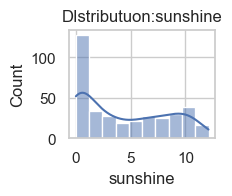

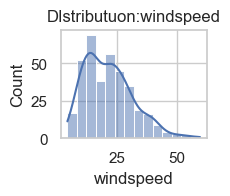

In [157]:

for i, column in enumerate(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'windspeed',
       ],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    plt.title(f'DIstributuon:{column}')
    plt.show()


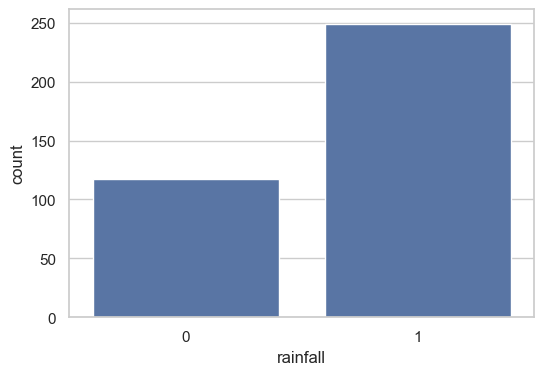

In [158]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=df)
plt.show('Distribution of rainfall')
plt.show()

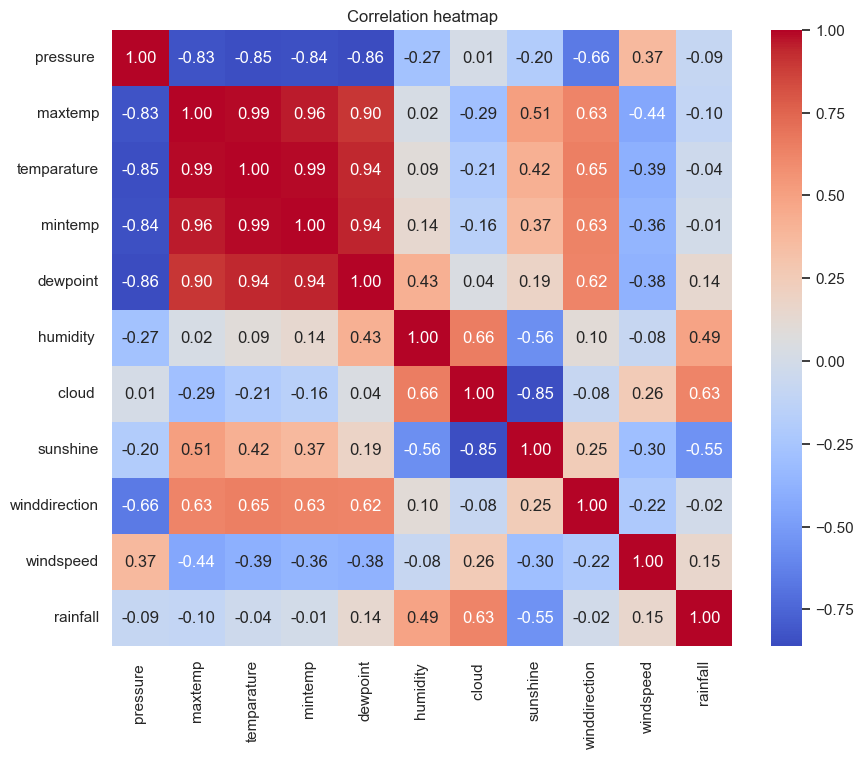

In [159]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

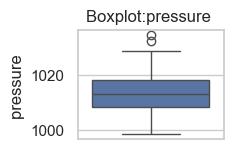

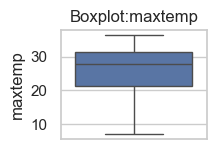

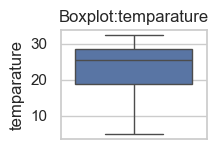

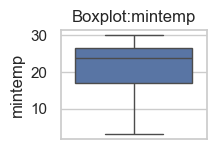

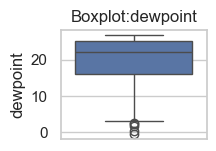

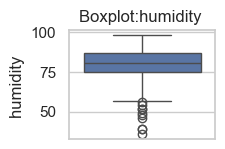

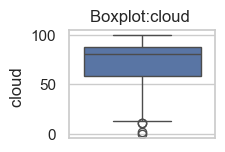

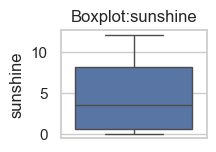

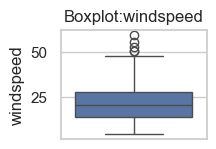

In [160]:

for i, column in enumerate(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'windspeed',
       ],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot:{column}')
    plt.show()


## Data preprocessing

In [161]:
# because of covariance remove similar column 
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'],axis=1)

In [162]:
df.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,19.9,95,81,0.0,40.0,13.7,1


In [163]:
#downsamping to remove unbalancing
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [164]:
#reduce 249 to 117
df_majority = df[df['rainfall']==1]
df_minority = df[df['rainfall']==0]

In [165]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [168]:
df_majority_downsample = resample(df_majority,replace=False,n_samples = len(df_minority),random_state=42)

In [169]:
df_majority_downsample.shape

(117, 8)

In [170]:
df_downsample = pd.concat([df_majority_downsample,df_minority])

In [171]:
df_downsample.shape

(234, 8)

In [173]:
df_downsample['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [174]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
188,1005.9,25.6,77,53,10.5,270.0,11.3,1
9,1017.5,15.5,85,91,0.0,70.0,37.7,1
137,1012.3,20.1,80,86,0.3,80.0,39.5,1
89,1018.3,16.3,79,89,2.4,40.0,14.8,1
157,1008.8,24.7,91,80,2.2,20.0,11.2,1


In [175]:
#shuffling the rows
df_downsample = df_downsample.sample(frac=1,random_state=42).reset_index(drop=True)

In [176]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1022.2,14.1,78,90,0.0,30.0,28.5,1
1,1013.4,19.5,69,17,10.5,70.0,12.4,0
2,1006.1,24.4,74,27,10.8,220.0,8.7,0
3,1007.6,24.8,85,84,1.8,70.0,34.8,1
4,1021.2,8.4,66,18,10.1,20.0,24.4,0


In [177]:
df_downsample['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [178]:
#split feature and target 
X = df_downsample.drop(columns=['rainfall'])
y= df_downsample['rainfall']

In [179]:
X

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5
1,1013.4,19.5,69,17,10.5,70.0,12.4
2,1006.1,24.4,74,27,10.8,220.0,8.7
3,1007.6,24.8,85,84,1.8,70.0,34.8
4,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,5.7,20.0,9.5
230,1010.1,19.9,91,89,0.0,70.0,31.8
231,1020.6,14.7,91,88,0.3,50.0,24.4
232,1008.3,24.1,74,29,5.7,10.0,4.4


In [180]:
y

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64

In [181]:
#splitting data into training and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [182]:
#hyperparameter tuning for random forest classifier
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators" : [50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [183]:
#finding best hyper parameters for model training
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [185]:
beast_rf_model =grid_search_rf.best_estimator_
print('best parameters',grid_search_rf.best_params_)

best parameters {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
#model evaluation with best parameters
cv_scores = cross_val_score(beast_rf_model,X_train,y_train,cv=5)
print('Cross validation',cv_scores)
print('mean cross-validation scores',np.mean(cv_scores))

Cross validation [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
mean cross-validation scores 0.818918918918919


In [187]:
#test set performance check
y_pred = beast_rf_model.predict(X_test)
print("test accuracy",accuracy_score(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))


test accuracy 0.7446808510638298
confusion_matrix [[17  7]
 [ 5 18]]
classification_report               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [189]:
#prediction on unknown data
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=['pressure ', 'dewpoint','humidity ', 'cloud ', 'sunshine','winddirection', 'windspeed'])
print(input_df)


   pressure   dewpoint  humidity   cloud   sunshine  winddirection  windspeed
0     1015.9      19.9         95      81       0.0           40.0       13.7


In [190]:
prediction = beast_rf_model.predict(input_df)
print("predicted res :", "Rainfall" if prediction[0]==1 else "No Rainfall")

predicted res : Rainfall


In [194]:
#picke file
model_data ={"model":beast_rf_model,
             "feature_names":X.columns.tolist()}
with open("model.pkl","wb") as file:
    pickle.dump(model_data,file)

In [195]:
#making prediction from pickle file
import pickle
import pandas as pd

In [196]:
#load the trained model and features from pickle file
with open("model.pkl","rb") as file:
    model_data = pickle.load(file)

In [197]:
model = model_data['model']
feature_name = model_data['feature_names']

In [198]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=feature_name)
print("predicted res :", "Rainfall" if prediction[0]==1 else "No Rainfall")

predicted res : Rainfall
